<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/MM_aut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [37]:
import warnings

warnings.filterwarnings('ignore')

input

In [38]:
df = pd.read_csv("MM_aut.csv")

exploratory

In [39]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Knowledge        717 non-null    int64
 1   Problem Solving  717 non-null    int64
 2   Interaction      717 non-null    int64
 3   Impact           717 non-null    int64
 4   Accountability   717 non-null    int64
dtypes: int64(5)
memory usage: 28.1 KB


In [40]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,221,48,52,90,0
1,75,27,36,64,0
2,181,48,66,64,0
3,75,36,36,90,0
4,75,36,36,90,0


checks

In [41]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,717.000000,717.000000,717.000000,717.000000,717.000000
mean,136.364017,50.490934,60.940028,121.083682,30.913529
std,61.321504,18.096312,21.964306,35.753755,17.380021
min,75.000000,27.000000,36.000000,55.000000,0.000000
25%,75.000000,36.000000,36.000000,90.000000,21.000000
50%,181.000000,48.000000,66.000000,116.000000,35.000000
75%,181.000000,65.000000,66.000000,142.000000,42.000000
max,300.000000,117.000000,150.000000,213.000000,75.000000


In [42]:
X=df

Scaling

In [43]:
cols = X.columns

In [44]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [45]:
X = pd.DataFrame(X, columns=[cols])

In [46]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.648889,0.233333,0.140351,0.221519,0.0
1,0.000000,0.000000,0.000000,0.056962,0.0
2,0.471111,0.233333,0.263158,0.056962,0.0
3,0.000000,0.100000,0.000000,0.221519,0.0
4,0.000000,0.100000,0.000000,0.221519,0.0


In [47]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.648889,0.233333,0.140351,0.221519,0.000000
1,0.000000,0.000000,0.000000,0.056962,0.000000
2,0.471111,0.233333,0.263158,0.056962,0.000000
3,0.000000,0.100000,0.000000,0.221519,0.000000
4,0.000000,0.100000,0.000000,0.221519,0.000000
...,...,...,...,...,...
712,0.084444,0.233333,0.263158,0.898734,0.333333
713,0.471111,0.233333,0.421053,0.639241,0.800000
714,0.471111,0.233333,0.421053,0.639241,0.800000
715,0.471111,1.000000,0.263158,0.816456,0.466667


K means

In [48]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [49]:
kmeans.cluster_centers_

array([[0.51969103, 0.32445039, 0.36246365, 0.40968321, 0.41664884],
       [0.00344671, 0.19183673, 0.06209401, 0.42759346, 0.40730807]])

inertia

In [50]:
kmeans.inertia_

116.7793012648842

Elbow

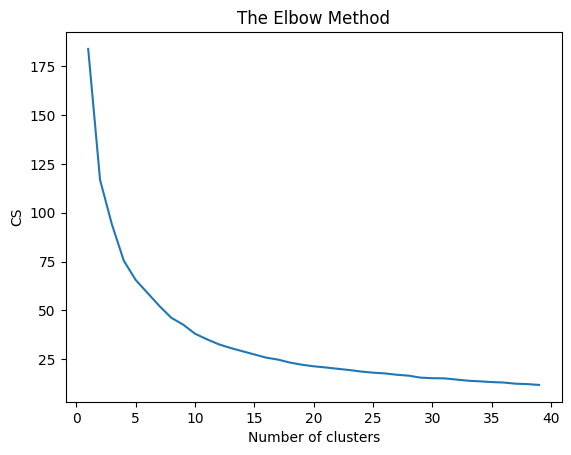

In [51]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

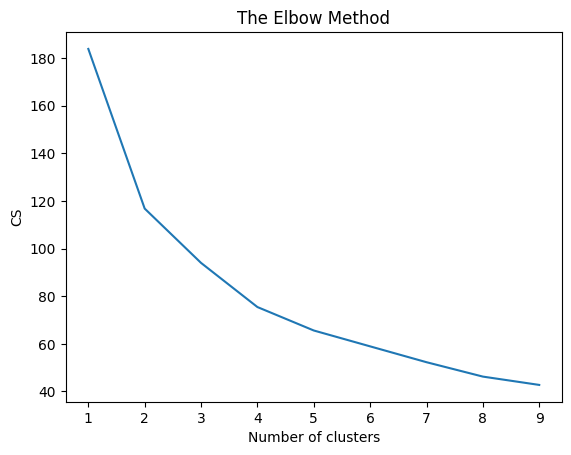

In [80]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 10), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [81]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [90]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('mm_aut_l')
print(labels)

[2 1 2 1 1 1 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 1 1 1 1 1 2 2 1 1 1 1 2 2 2 2 1
 1 2 1 1 2 2 1 2 1 1 2 1 2 2 1 1 1 2 1 2 2 2 1 1 2 2 2 1 2 2 2 2 2 1 1 2 1
 2 1 1 2 2 1 2 2 2 1 2 1 1 1 1 1 1 1 2 2 2 2 3 1 1 1 1 1 1 0 0 1 0 0 2 2 2
 2 2 1 1 1 3 1 1 1 2 2 2 2 2 2 3 2 2 3 3 1 0 0 0 0 0 0 2 2 1 1 1 3 2 2 3 0
 3 3 2 2 3 3 3 2 2 2 1 2 2 0 2 2 2 3 3 3 3 3 3 2 2 3 3 3 0 0 2 1 2 0 0 3 3
 0 0 3 3 2 2 2 2 2 2 2 2 0 0 1 0 3 0 0 0 0 0 0 1 3 0 0 0 3 3 3 3 0 3 1 0 0
 3 3 0 0 0 0 3 3 0 0 0 0 3 0 3 3 3 3 0 0 3 3 3 0 3 3 0 0 3 3 3 0 0 3 0 3 0
 3 0 3 3 0 3 0 0 0 0 0 0 3 0 0 3 0 0 0 3 2 0 3 0 3 0 3 0 3 0 0 3 0 0 0 0 0
 0 0 3 0 0 0 0 0 2 2 2 2 2 0 1 3 3 1 1 1 2 2 3 0 2 3 0 2 2 3 1 1 2 1 1 1 2
 1 1 1 1 1 1 2 3 0 3 0 0 1 3 2 2 2 3 0 3 3 2 1 0 2 2 1 1 1 1 1 2 1 2 0 2 2
 3 3 0 1 0 0 0 1 3 1 3 0 0 3 2 1 3 0 1 1 0 0 0 1 1 1 1 0 3 3 0 0 2 2 1 2 1
 2 1 1 2 2 1 1 1 2 1 2 3 0 2 1 1 2 2 2 0 1 1 1 1 1 2 1 1 2 1 2 0 0 0 1 1 0
 3 1 1 3 3 3 1 2 2 1 1 0 2 1 1 0 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1
 1 2 2 3 0 1 1 0 0 3 3 1 

In [83]:
Z=kmeans.cluster_centers_
Z

array([[5.42047550e-01, 3.79039301e-01, 4.05653873e-01, 5.50080150e-01,
        5.24250364e-01],
       [1.66533454e-16, 4.30030030e-02, 1.19013751e-02, 2.81115293e-01,
        3.77801802e-01],
       [4.87160494e-01, 2.32947531e-01, 2.94468811e-01, 1.83016878e-01,
        2.44537037e-01],
       [7.96645702e-03, 3.70090846e-01, 1.21758800e-01, 6.00987183e-01,
        4.42599581e-01]])

In [84]:

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 717 samples in 0.001s...
[t-SNE] Computed neighbors for 717 samples in 0.051s...
[t-SNE] Computed conditional probabilities for sample 717 / 717
[t-SNE] Mean sigma: 0.192449


KeyboardInterrupt: ignored

In [85]:
import matplotlib

In [86]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 717 samples in 0.001s...
[t-SNE] Computed neighbors for 717 samples in 0.052s...
[t-SNE] Computed conditional probabilities for sample 717 / 717
[t-SNE] Mean sigma: 0.192449
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.082253
[t-SNE] KL divergence after 1700 iterations: 0.185597


In [87]:
np.unique(labels)


array([0, 1, 2, 3], dtype=int32)

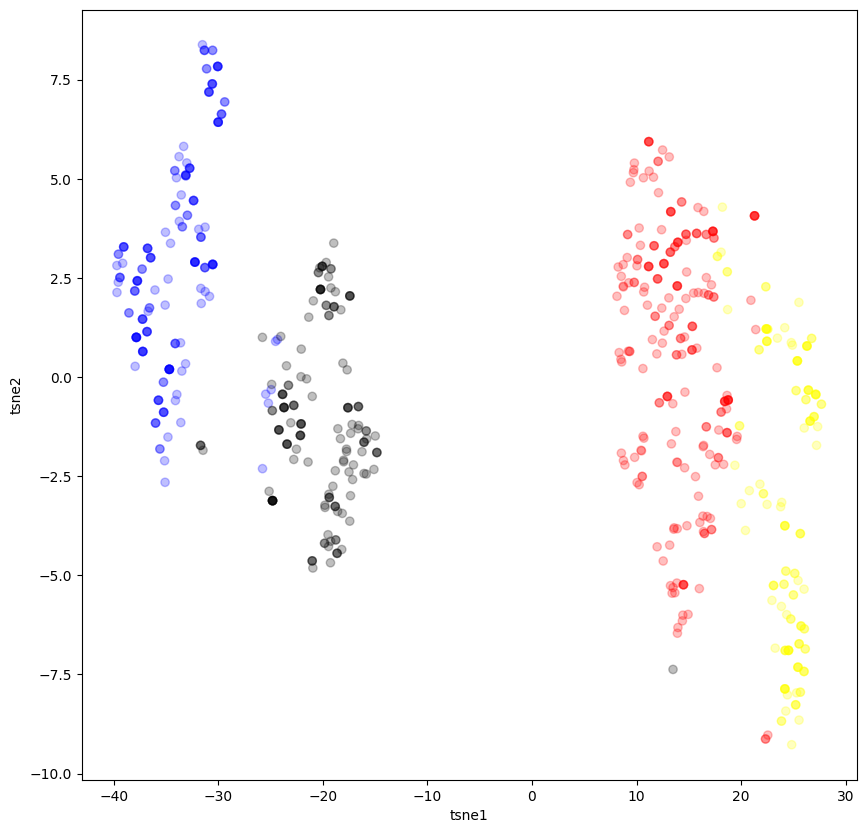

In [88]:
colors = ["red","green","blue","purple","yellow","cyan","black"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [91]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_mm_aut.csv')
Z2

array([[196.96069869,  61.11353712,  82.24454148, 141.91266376,
         39.31877729],
       [ 75.        ,  30.87027027,  37.35675676,  99.41621622,
         28.33513514],
       [184.61111111,  47.96527778,  69.56944444,  83.91666667,
         18.34027778],
       [ 76.79245283,  60.3081761 ,  49.88050314, 149.95597484,
         33.19496855]])